## Metoda wytwórcza (ang. Factory Method)

**Typ**: kreacyjny \
**Zakres**: klasowy \
**Inne nazwy**: wirtualny konstruktor, metoda fabrykująca

<div style="border: solid 1px;padding: 20px;text-align: center">
    Wzorzec <b>metoda wytwórcza</b> definiuje interfejs pozwalający na tworzenie obiektów, przy czym pozwala klasom podrzędnym decydować, jakiej klasy obiekt zostanie utworzony. Wzorzec metoda fabrykująca przekazuje odpowiedzialność za tworzenie obiektów do klas podrzędnych.
</div>

Diagram klas

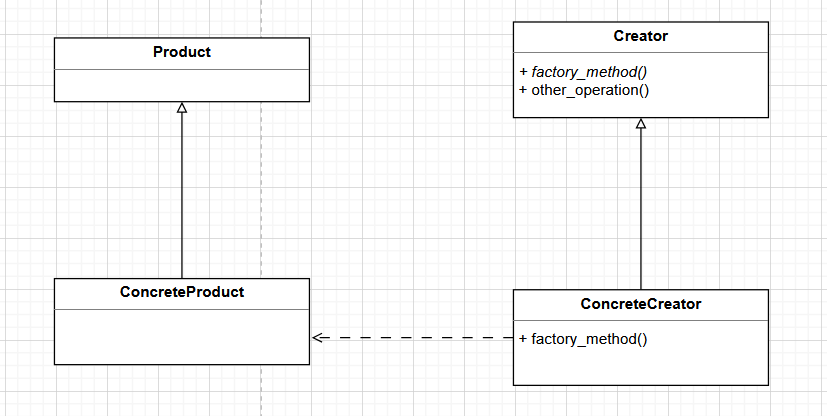

Diagram sekwencji

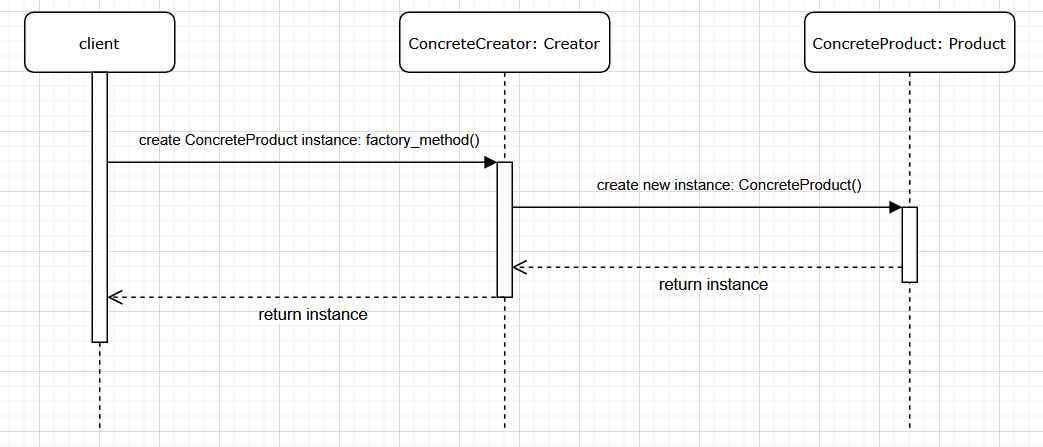

Jak sama nazwa wskazuje, głównym bohaterem tego wzorca nie jest klasa tylko metoda. Metoda wytwórcza to metoda abstrakcyjna oddelegowująca proces tworzenia obiektów do klas podrzędnych.

### Intro

Zgodnie z regułami projektowania nie powinniśmy tworzyć implementacji, ale przecież za każdym razem, kiedy używamy konstruktora klasy właśnie to jest to co robimy, prawda?

Rzeczywiście, za każdym razem, kiedy korzystasz z konstruktora klasy, tworzysz obiekt będący reprezentacją rzeczywistej klasy, czyli bezdyskusyjnie jest to tworzenie implementacji, a nie interfejsu.

In [46]:
import abc


class IDuck(abc.ABC):
    ...


class WildDuck(IDuck):
    ...


In [47]:
# client code

duck: IDuck = WildDuck()
# IDuck - aby utrzymać elastyczność kodu, chcemy skorzystać z interfejsów
# WildDuck() - ale musimy utworzyć obiekt konkretnej, rzeczywistej klasy

Kiedy posiadasz już cały zestaw powiązanych ze sobą, rzeczywistych klas, często jesteś zmuszony do tworzenia kodu postaci:

In [48]:
# client code
picnic = True

if picnic:
    duck = WildDuck()
elif hunting:
    duck = CallDuck()
elif bathing:
    duck = RubberDuck()

Kiedy zaczynasz analizować taki kod szybko dochodzisz do wniosku, że kiedy nastąpi zmiana wymagań bądź konieczność rozbudowy danej aplikacji, nie obejdzie się, niestety, bez modyfikacji istniejącego kodu i dodawania bądź usuwania z niego całych fragmentów. Często taki kod posiada powiązania z wieloma innymi elementami programu, co czyni jego konserwacje i aktualizację niezwykle uciążliwą i podatną na błędy.

W takim razie **co jest nie tak z konstruktorem**?

Wszystko w porządku. To nie jego wina. Prawdziwym sprawcą problemów jest ZMIANA i to w jaki sposób wpływa ona na konstruktor.

Zatem, co możesz w takiej sytuacji zrobić?

Pamiętaj! \
*Dokonaj identyfikacji wszystkich zmiennych elementów aplikacji, a następnie oddziel je od elementów, które pozostają niezmienione.*

### 1. Identyfikacja zmieniających się elementów kodu.

Wyobraźmy sobie, że mamy pizzerię, robimy pizzę.

In [49]:
class Pizza:
    ...


In [50]:
# client code
def order_pizza():
    pizza: Pizza = Pizza()

    # To pizza wie jak się pokroić, upiec, pociąć i zapakowanć.
    pizza.prepare()
    pizza.bake()
    pizza.cut()
    pizza.box()
    return pizza

Potrzebujemy więcej rodzajów pizz.

In [51]:
import abc

class IPizza(abc.ABC):
    @abc.abstractmethod
    def prepare(self):
        ...

    @abc.abstractmethod
    def bake(self):
        ...

    @abc.abstractmethod
    def cut(self):
        ...

    @abc.abstractmethod
    def box(self):
        ...


class CheesePizza(IPizza):
    ...


class GreekPizza(IPizza):
    ...


class PepperoniPizza(IPizza):
    ...


In [52]:
# client code
def order_pizza(pizza_type: str):

    if pizza_type == "cheese":
        pizza: IPizza = CheesePizza()
    elif pizza_type == "greek":
        pizza: IPizza = GreekPizza()
    elif pizz_type == "pepperoni":
        pizza: IPizza = PepperoniPizza()

    pizza.prepare()
    pizza.bake()
    pizza.cut()
    pizza.box()
    return pizza

**ZMIANA** - klienci chcą nowych pizz, a niektóre stare się już nie sprzedają.

In [53]:
class IPizza():
    def prepare(self):
        ...

    def bake(self):
        ...

    def cut(self):
        ...

    def box(self):
        ...


class CheesesPizza(IPizza):
    ...


# usunęliśmy grecką


class PepperoniPizza(IPizza):
    ...


class ClamPizza(IPizza):  # new
    ...


class VeggiePizza(IPizza):  # new
    ...


In [54]:
# client code
def order_pizza(pizza_type: str):

    if pizza_type == "cheese":
        pizza: IPizza = CheesePizza()
    # usunęliśmy `elif pizza_type == "greek":`
    elif pizz_type == "clam":  # new elif
        pizza: IPizza = ClamPizza()
    elif pizz_type == "veggie":  # new elif
        pizza: IPizza = VeggiePizza()
    elif pizz_type == "pepperoni":
        pizza: IPizza = PepperoniPizza()

    pizza.prepare()
    pizza.bake()
    pizza.cut()
    pizza.box()
    return pizza

Ten kod nie jest zamknięty na modyfikacje. Jeśli pizzeria zmieni swoją ofertę, będziemy musieli powracać do tego miejsca w kodzie i modyfikować go.

W tym przykładzie wyraźnie odseparowuje się fragment kodu, który będzie ulegał modyfikacjom od fragmentu kodu, który będzie pozostawał niezmieniony.

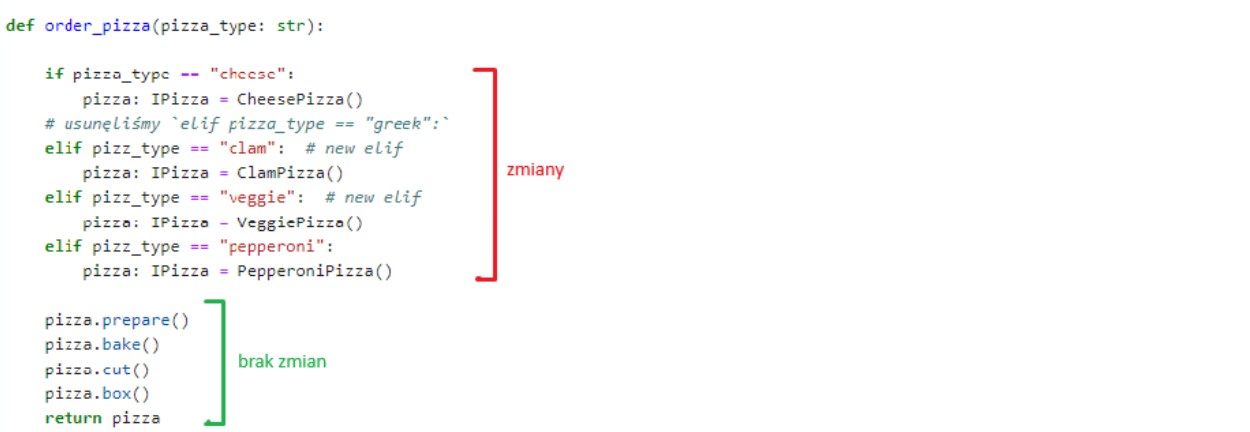

Wyraźnie widać, że właśnie wybór klasy, która zostanie użyta do tworzenia obiektu, powoduje zamieszanie w metodzie `order_pizza` i skutecznie blokuje jej możliwość zamknięcia na modyfikacje.

Zidentyfikowaliśmy już zmieniające się elementy aplikacji, więc jesteśmy gotowi na zastosowanie hermetyzacji.

### 2. Hermetyzacja zmieniających się elementów kodu.

Zmianie ulega fragment metody `order_pizza`, który odpowiada za proces tworzenia obiektu pizzy. Wobec tego przenieśmy go poza ramy metody. Tylko gdzie?

To co teraz zrobimy będzie polegało na zabraniu całego kodu odpowiedzialnego za tworzenie pizzy i przełożenie go do innego obiektu, którego wyłączną i jedyną odpowiedzialnością będzie tworzenie pizzy. Jak go nazwiemy? Fabryka pizzy wydaje sie być odpowiednią nazwą - prosta fabryka pizzy.

In [55]:
# TODO: stwórz SimpleFactory
class SimpleFactory:
    def create_product(self, pizza_type:str):
        if pizza_type == "cheese":
            pizza: IPizza = CheesePizza()
        # usunęliśmy `elif pizza_type == "greek":`
        elif pizz_type == "clam":  # new elif
            pizza: IPizza = ClamPizza()
        elif pizz_type == "veggie":  # new elif
            pizza: IPizza = VeggiePizza()
        elif pizz_type == "pepperoni":
            pizza: IPizza = PepperoniPizza()        

To właśnie obiekty tej klasy zapewniają całkowitą hermetyzacje procesu tworzenia obiektów implementujących interfejs IPizza (czyli tych obiektów, które w naszym świecie nazywamy pizzami). Teraz kod klienta wyglądać będzie tak:

In [56]:
# client code
def order_pizza(self, pizza_type: str):
    
    # TODO: zainicjalizuj i użyj SimplePizzaFactory
    factory = SimpleFactory()
    pizza = factory.create_product(pizza_type)

    pizza.prepare()
    pizza.bake()
    pizza.cut()
    pizza.box()
    return pizza

Za każdym razem, kiedy metoda `order_pizza` będzie potrzebowała nowej pizzy, będzie musiała poprosić fabrykę o jej przygotowanie. Czasy, kiedy metoda `order_pizza` musiała znać różnicę pomiędzy pizzą gracką, a pizzą serową odeszły w niepamięć.

Na razie przenieślismy tylko kod z jednej funkcji do innej. Jaką mamy z tego korzyść?

`SimplePizzaFactory` może mieć wielu klientów. Na razie jej jedynym klientem jest metoda `order_pizza`, ale wyobraźmy sobie klasę `PizzaMenu`, która mogłaby wykorzystywać `SimplePizzaFactory` do pobierania informacji o wszystkich dostępnych pizzach, ich opisu i cen. Albo klasę `HomeDeliveryPizza`, która teoretycznie też mogłaby być klientem `SimplePizzaFactory`. Dzięki hermetyzacji procesu tworzenia pizzy mamy tylko jeden element, jedno miejscie które będzie podlegało modyfikacjom przy zmianie zasad tworzenia pizz w systemie. 

Struktura, która właśnie stworzyliśmy nie istnieje w katalogu wzorców GoF. Mimo to pojawia się stosunkowo często. I równie często mylona jest z właściwym wzorcem metody wytwórczej. Na tyle często, że zyskała nawet swoją nazwę - **Prosta fabtyka (ang. Simple factory)**.

Simple factory - diagram klas

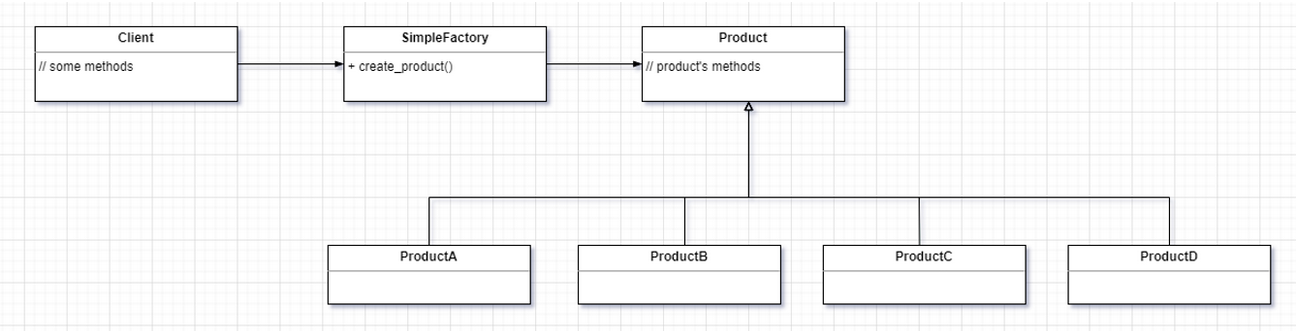

A w naszym konkretnym przypadku

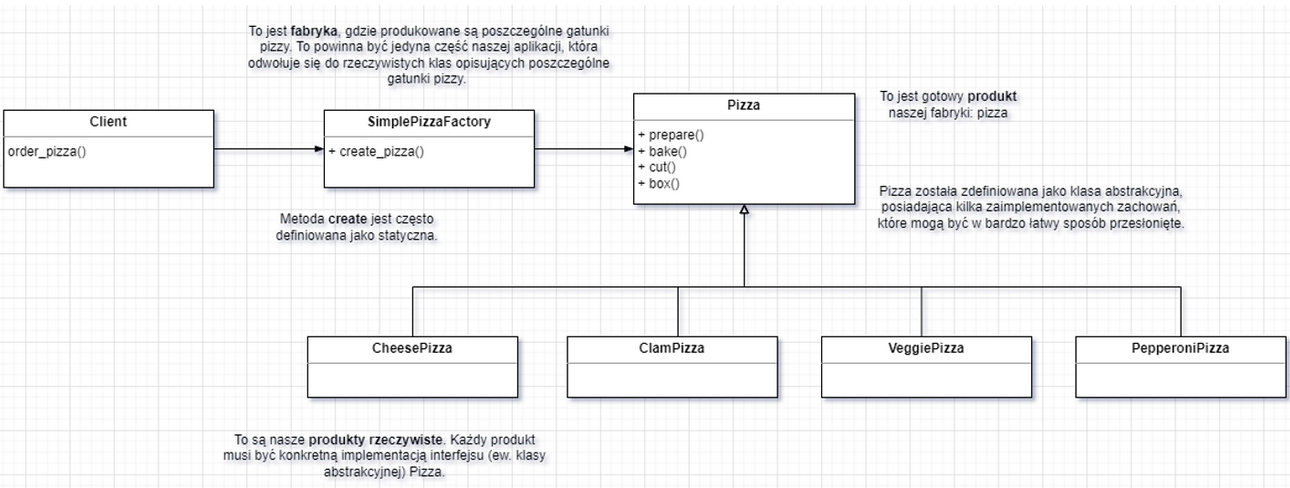

Ponieważ struktura klasy, którą nazywamy prostą fabryką nie jest zgodna ze wzorcem fabryki GoF od tego momentu zamiast używać nazwy fabryka (`SimplePizzaFactory`) będziemy używać nazwy pizzerria (`PizzaStore`).

Ok, mamy jedną pizzerę. Z czasem jest coraz bardziej popularna. Zaczyna zamieniać się w sieciówkę. Coraz więcej osób otwiera naszą pizzerię. Początkowo wszystko jest takie same, ale z czasem pojawiają się lokalne zmiany. Jeden franczyzobiorca chce, żeby pizzeria produkowała pizze po włosku - aromatyczne, na cienkim cieście, bo jego klienci za nimi przepadają, a drugi żeby produkowała pizze po amerykańsku - na grubym cieście, ociekające serem. Innymi słowami w różnych pizzeriach pojawiła się potrzeba na różne rodzaje pizz.

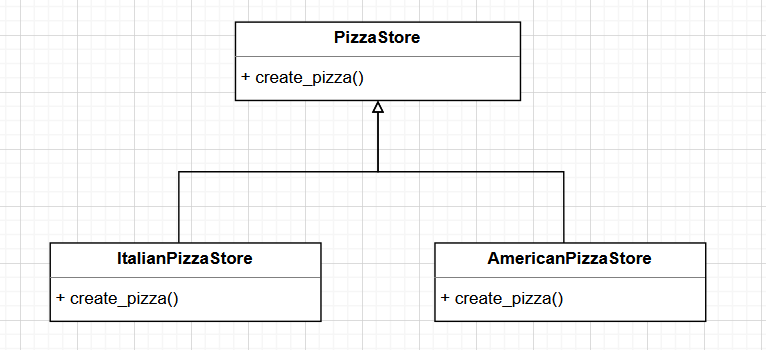

In [57]:
class ItalianPizzaFactory:
    def create_pizza(self, pizza_type: str):
        """Create a pizza in the Italian style"""
        if pizza_type == "...":
            # przygotuj po włosku (inicjalizujemy klasy włoskich pizz)
            ...

class AmericanPizzaFactory:
    def create_pizza(self, pizza_type: str):
        """Create a pizza in the American style"""
        # przygotuj po amerykańsku (inicjalizujemy klasy amerykańskich pizz)
        if pizza_type == "...":
            ...

class MexicanPizzaFactory:
    def create_pizza(self, pizza_type: str):
        """Create a pizza in the Mexican style"""
        # przygotuj po meksykańsku (inicjalizujemy klasy meksykańskich pizz)
        if pizza_type == "...":
            ...


Ponadto przekonujemy się, że co prawda poszczególni franczyzobiorcy wykorzystują nasze pizzerie do tworzenia pizzy, ale do reszty procesu przygotowywania pizzy zaczęli stosować swoje własne rozwiązania: poszczególne rodzaje pizzy były pieczone na różne sposoby, niektórzy zapominali, że pizzę należy przed dostarczeniem pokroić. Jednym słowem niezmienny do tej pory fragment kodu

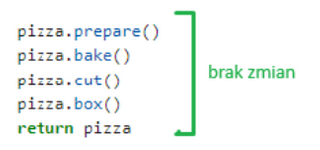

zaczął ulegać zmianom.

Przenieśmy go zatem do kodu naszej pizzeri. Wzorzec dotyczy metody a nie klasy, dlatego nie będzie miało to żadnego wpływu na nasz wzorzec.

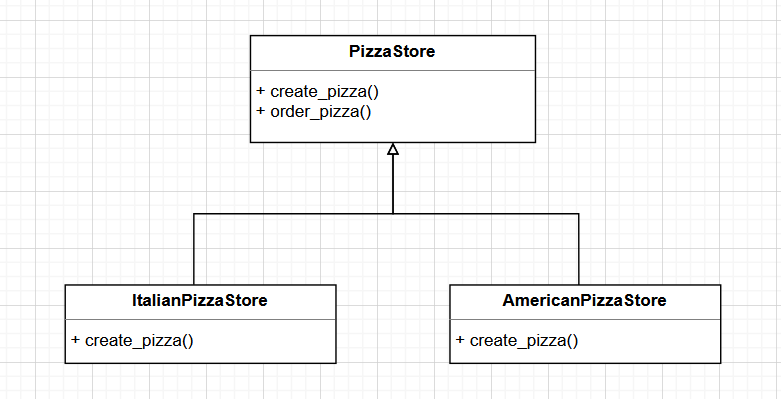

In [58]:
class PizzaStore:
    def create_pizza(self, pizza_type: str):
        if pizza_type == "cheese":
            pizza: IPizza = CheesePizza()
        elif pizza_type == "clam":
            pizza: IPizza = ClamPizza()
        elif pizza_type == "veggie":
            pizza: IPizza = VeggiePizza()
        elif pizza_type == "pepperoni":
            pizza: IPizza = PepperoniPizza()

        return pizza

    def order_pizza(self, pizza_type: str):
        pizza = self.create_pizza(pizza_type)
    
        pizza.prepare()
        pizza.bake()
        pizza.cut()
        pizza.box()
        return pizza

Na ten moment nasz pierwotny kod zamknęliśmy w klasie i rozbiliśmy na dwie metody.

Zróbmy jeszcze metodę `create_pizza` metodą abstrakcyjną pozostawiając w ten sposób implementacje metody poszczególnym klasom pochodnym, tym samym zapewniając franczyzobircom możliwość tworzenia regionalnych pizzy (pizzeria włoska będzie robiła pizzę serową po włosku, a pizzeria amerykańska po amerykańsku).

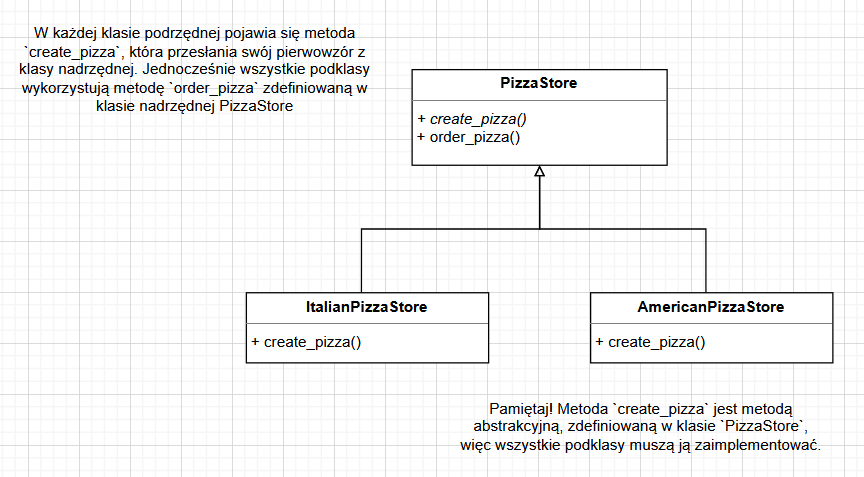

In [59]:
import abc

class PizzaStore(abc.ABC):
    def order_pizza(self, pizza_type: str):
        pizza: Pizza = self.create_pizza(pizza_type)

        pizza.prepare()
        pizza.bake()
        pizza.cut()
        pizza.box()

        return pizza

    # TODO: stwórz abstrakcyjną metodę wytwórczą create_pizza
    @abc.abstractmethod
    def create_pizza(pizza_type: str) -> Pizza:
        ...

In [60]:
# Jeżeli dany oddział lokalny chce sprzedawać swoim klientom pizzę robioną w stylu włoskim, będzie wykorzystywał 
# podklasę `ItalianPizzaStore`. Podklasa ta posiada swoją własną metodę `create_pizza`, która jest odpowiedzialna 
# za tworzenie włoskiej pizzy.
class ItalianPizzaStore(PizzaStore):
    # TODO: przysłoń metodę wytwórczą
    def create_pizza(self, pizza_type: str):
        if pizza_type == "cheese":
            pizza: IPizza = ItalianStyleCheesePizza()
        elif pizza_type == "clam":
            pizza: IPizza = ItalianStyleClamPizza()
        elif pizza_type == "veggie":
            pizza: IPizza = ItalianStyleVeggiePizza()
        elif pizza_type == "pepperoni":
            pizza: IPizza = ItalianStylePepperoniPizza()
    
        return pizza

# zauważ, że metoda `order_pizza()` z klasy nadrzędnej `PizzaStore` nie ma pojęcia, jaka pizza zostanie utworzona, 
# metoda ta "wie" tylko, że otrzymaną pizzę należy odpowiednio przygotować, upiec, pokroić i wreszcie zapakować.

In [61]:
# Podobnie korzystając z podklasy `AmericanPizzaStore` otrzymujemy implementację metody `create_pizza`, 
# która doskonale "orientuje się" w szczegółach tworzenia pizzy w stylu amerykańskim.
class AmericanPizzaStore(PizzaStore):
    # TODO: przysłoń metodę wytwórczą
    def create_pizza(self, pizza_type: str):
        if pizza_type == "cheese":
            pizza: IPizza = AmericanStyleCheesePizza()
        elif pizza_type == "clam":
            pizza: IPizza = AmericanStyleClamPizza()
        elif pizza_type == "veggie":
            pizza: IPizza = AmericanStyleVeggiePizza()
        elif pizza_type == "pepperoni":
            pizza: IPizza = AmericanStylePepperoniPizza()
    
        return pizza

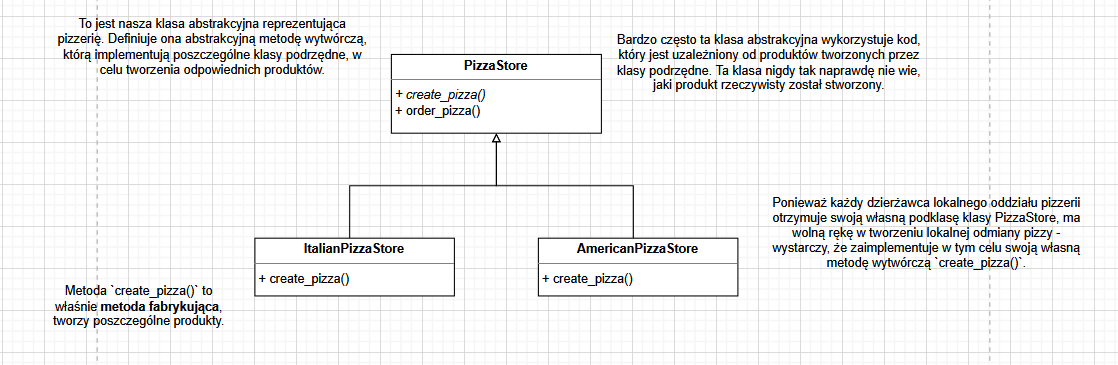

Metoda wytwórcza obsługuje tworzenie obiektów i powoduje hermetyzację tego procesu w klasie podrzędnej. Takie rozwiązanie powoduje usunięcie sprzężenia pomiędzy kodem klienta w klasie nadrzędnej, a kodem odpowiedzialnym za  tworzenie obiektów, zlokalizowanym w klasie podrzędnej.

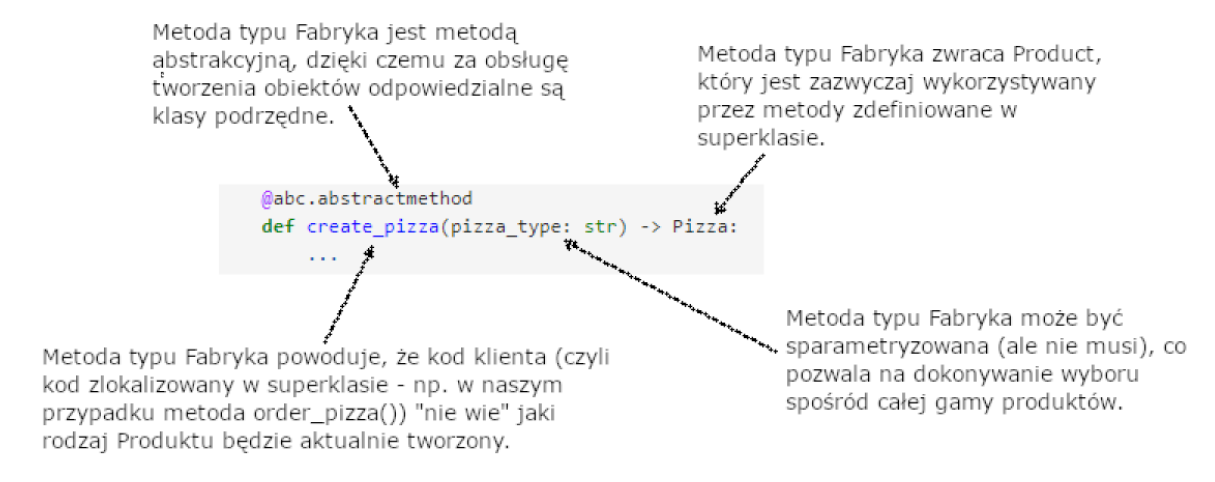

Ok, istote wzorca już omówiliśmy. Dla kompletności przykładu stwórzmy jeszcze kilka produktów.

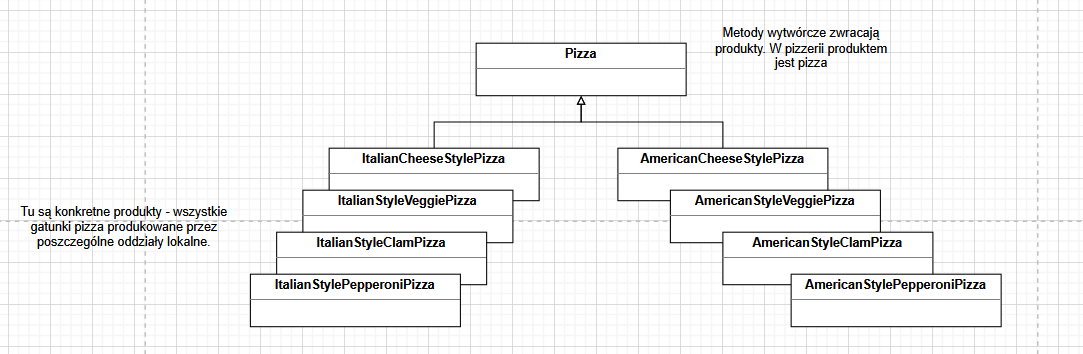

In [62]:
import abc


class Pizza(abc.ABC):
    
    def __init__(self):
        self.name: str
        self.dough: str
        self.sauce:  str
        self.toppings: list = []

    # klasa abstrakcyjna zapewnia zestaw podstawowych, domyślnych procedur opisujących proces pieczenia, 
    # krojenia oraz pakowania pizzy
    def prepare(self):
        print(f"Przygotowanie {self.name}")
        print(f"Wyrabianie ciasta...")
        print(f"Dodawanie sosu...")
        print(f"Dodatki:")
        for item in self.toppings:
            print(f"\t {item}")

    def bake(self):
        print("Pieczenie: 25 minut w temperaturze 350 stopni Celsjusza")

    def cut(self):
        print("Krojenie pizzy na 8 kawałków")

    def box(self):
        print("Pakowanie pizzy w oficjalne pidełko naszej sieci Pizzerii")

    def get_name(self):
        return self.name


Teraz doróbmy kilka konkretnych podklas. Zróbmy klasy reprezentujące włoską i amerykańską odmianę pizzy serowej.

In [63]:
class ItalianStyleCheesePizza(Pizza):
    def __init__(self):
        super().__init__()
        self.name = "Włoska pizza serowa z sosem Marinara"
        self.dough = "Cienkie kruche ciasto"
        self.sauce = "Sos Marinara"

        self.toppings.append("Tarty ser Reggiano")


class AmericanStyleCheesePizza(Pizza):
    def __init__(self):
        super().__init__()
        self.name = "Amerykańska pizza serowa"
        self.dough = "Ekstra grube, chrupkie ciasto"
        self.sauce = "Sos z pomidorów śliwkowych"

        self.toppings.append("Grubo tarty ser Mozzarella")

    def cut(self):
        """
        Pizza amerykańska wymaga krojenia pizzy na kwadratowe kawałki stąd podklasa `AmericanStyleCheesePizza` 
        implementuje metodę `cut()`, która prezsłania swój odpowiednik z superklasy.
        """
        print("Krojenie pizzy na kwadratowe kawałki")
    

Zestawmy obie rodziny klas (pizzerie i pizze) ze sobą.

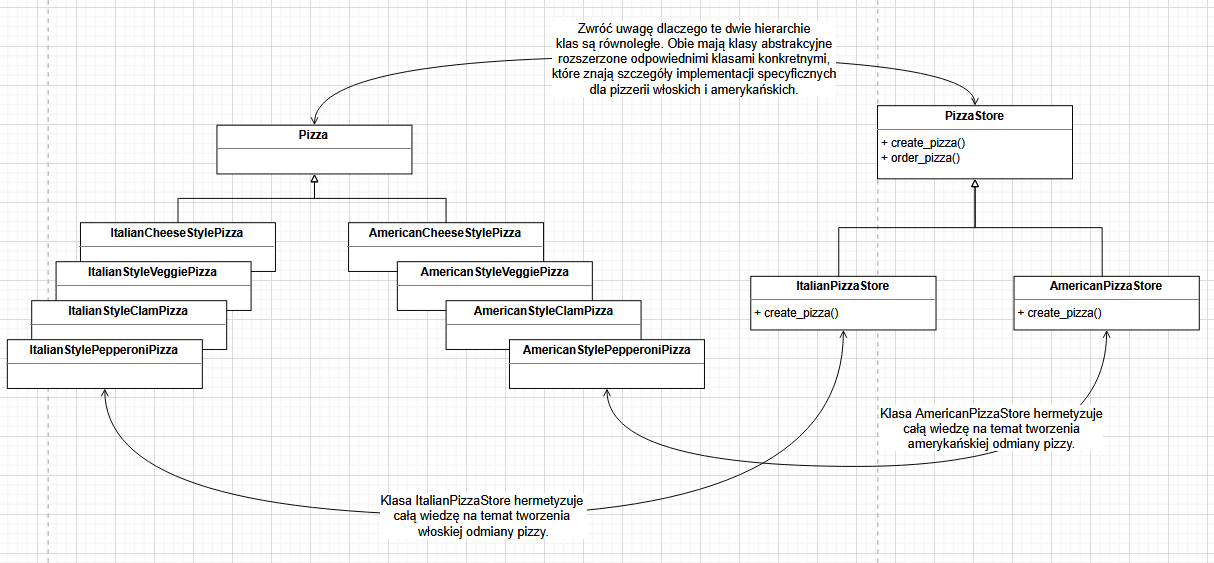

Zobaczmy jak to działa.

Diagram klas

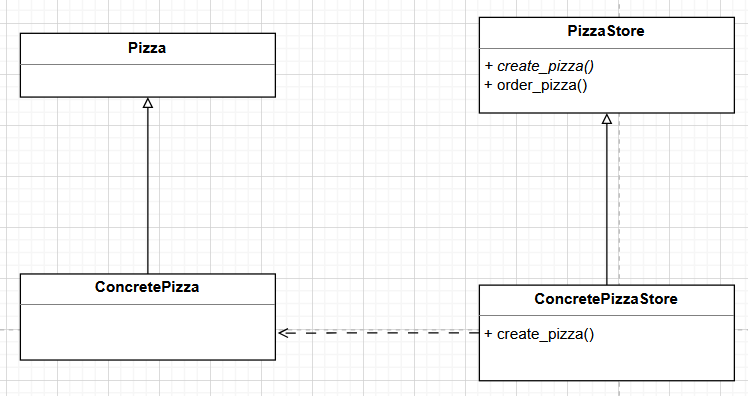

Diagram sekwencji

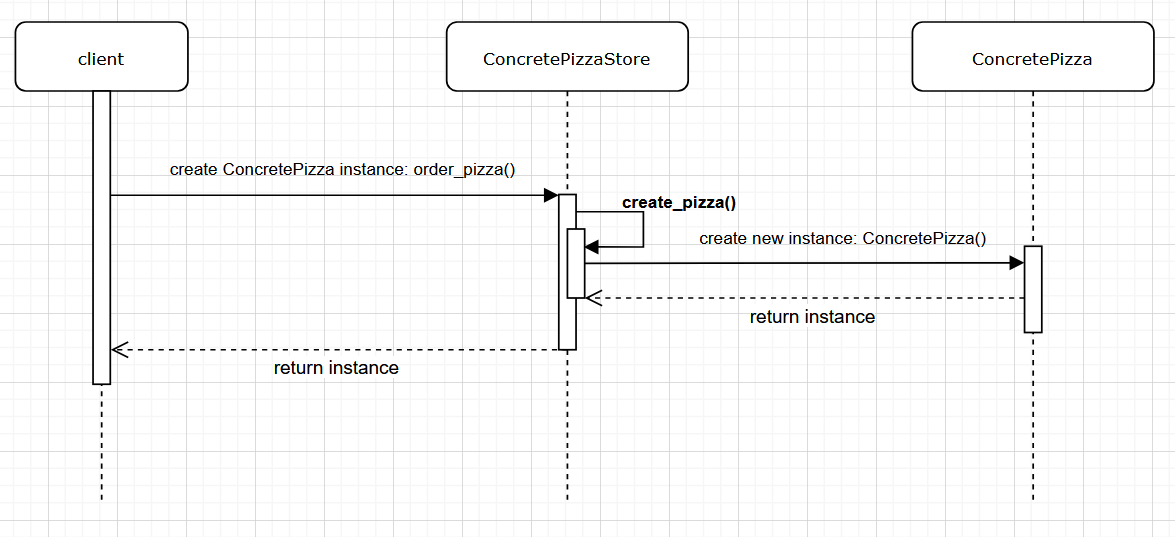

Eryk uwielbia włoską pizzę, a Jacek amerykańską. Co musi się zadziać, żeby Eryk i Jacek dostali swoje pizze?

1. Przede wszystkim, Jacek i Eryk potrzebują instancji obiektu klasy `PizzaStore`. Jacek musi utworzyć obiekt klasy `AmericanPizzaStore`, a z kolei Eryk musi utworzyć obiekt klasy `ItalianPizzaStore`.

In [64]:
# 1. Potrzebujemy obiekt klasy AmericanPizzaStore i ItalianPizzastore 
# TODO: inicjalizacja obu implementacji PizzaStore
italiana_pizza_store: PizzaStore = ItalianPizzaStore()
american_pizza_store: PizzaStore = AmericanPizzaStore()

2. Mając odpowiednie obiekty klasy `PizzaStore` w ręku, zarówno Jacek, jak i Eryk mogą wywołać metodę `order_pizza()` i przekazać do niej typ pizzy, jaką chcą otrzymać

In [65]:
## 2. mamy odpowiedni oddział, wiec możemy składać zamówienie

#TODO: użyj implementacji AmericanPizzaStore
pizza_jacka = american_pizza_store.order_pizza(pizza_type="cheese")
## Wywołana metoda `order_pizza` jest metodą instancji obiektu klasy `ItalianPizzaStore`.

Przygotowanie Amerykańska pizza serowa
Wyrabianie ciasta...
Dodawanie sosu...
Dodatki:
	 Grubo tarty ser Mozzarella
Pieczenie: 25 minut w temperaturze 350 stopni Celsjusza
Krojenie pizzy na kwadratowe kawałki
Pakowanie pizzy w oficjalne pidełko naszej sieci Pizzerii


In [67]:
pizza_jacka

In [66]:
# TODO: użyj implementacji ItalianPizzaStore

Co się stało pomiędzy wywołaniem metody `order_pizza`, a zwróceniem konkretnej instancji pizzy?
- metoda `order_pizza` woła metodę `create_pizza` (czyli metodę wytwórczą, ta metoda jest zaimplementowana w klasie podrzędnej. W przykładzie Eryka jako rezultat jej działania zostanie zwrócona serowa pizza amerykańska).
- metoda `order_pizza` nie ma pojęcia, jaki rodzaj pizzy został utworzony, ale "wie", że jest to pizza, którą trzeba teraz przygotować, upiec, pokroić i zapakować dla Eryka (wszystkie te metody są tworzą interfejs `Pizza`).
